# Let's send Prof. Wilson's kids to college

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

### Cost of College

In [61]:
# https://www.hendrix.edu/financialaid/default.aspx?id=236
yearly_cost = 48_700

In [62]:
total_cost = yearly_cost * 4
total_cost

194800

In [63]:
# https://www.hendrix.edu/admission/international.aspx?id=35098
yearly_aid = 22_000

In [64]:
total_aid = yearly_aid * 4
total_aid

88000

In [65]:
out_of_pocket = total_cost - total_aid
out_of_pocket

106800

### Rate of Return

In [66]:
years = 15

In [67]:
index_fund_returns = np.random.normal(loc=0.07, scale=0.03, size=years)

In [68]:
index_fund_returns

array([0.0782064 , 0.05682417, 0.02250354, 0.07110906, 0.06365752,
       0.10472106, 0.08858122, 0.07697393, 0.08565508, 0.13364737,
       0.03194821, 0.09497609, 0.09615471, 0.09616511, 0.09004809])

### Savings

In [74]:
initial_balance = 5_000

In [75]:
balance = [initial_balance]

### Simulation

In [70]:
trials = 500

In [71]:
for ret in index_fund_returns:
    new_balance = balance[-1] * (1 + ret)
    balance.append(new_balance)

In [72]:
balance

[5000,
 5391.031992166219,
 5697.372903017125,
 5825.583935398445,
 6239.8357300963235,
 6637.048196856637,
 7332.086929826922,
 7981.5721361486785,
 8595.945114588187,
 9332.231483077068,
 10579.459653966203,
 10917.45450252143,
 11954.351641110705,
 13103.818839180634,
 14363.948962685241,
 15657.395147737589]

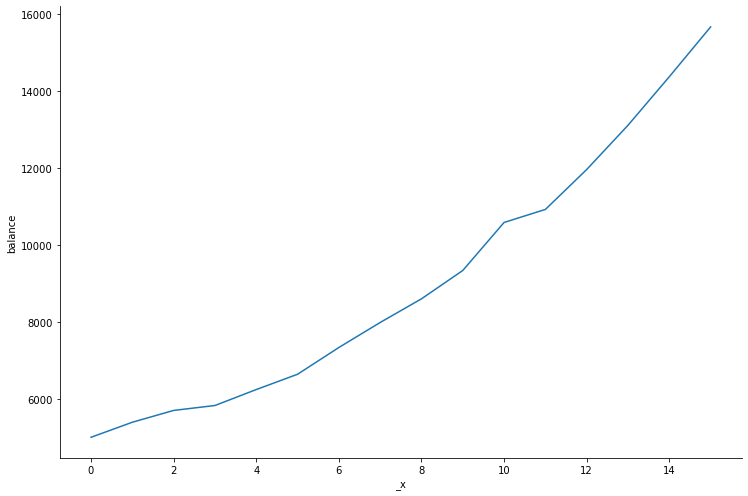

In [73]:
df = pd.DataFrame(balance, columns=['balance'])

line = sns.relplot(
    data=df,
    x=df.index,
    y='balance',
    height=7,
    aspect=1.5,
    kind='line'
)

In [76]:
df = pd.DataFrame()

for e in range(trials):
    index_fund_returns = np.random.normal(loc=0.07, scale=0.03, size=years)
    balance = [initial_balance]
    
    for ret in index_fund_returns:
        new_balance = balance[-1] * (1 + ret)
        balance.append(new_balance)
        
    df = df.copy() # fix fragmentation
    df[e] = balance

In [78]:
df.shape

(16, 500)

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
1,5514.299284,5668.900315,5161.620470,5194.199891,5487.811846,5381.404854,5025.601621,5277.269640,5260.675391,5198.040006,...,5386.575678,5270.552913,5352.682424,5388.384750,5257.046609,5387.727933,5488.530556,5489.305999,5504.297768,5486.076619
2,5882.867451,5874.934341,5591.068254,5295.874985,5571.097388,5647.606649,5445.894635,5741.148100,5623.376599,5712.087680,...,5830.077543,5737.281788,5639.509218,5754.327934,5636.693290,5720.613948,5933.940073,5812.968703,5769.218894,5687.791722
3,6231.115443,5903.293276,5888.287156,5870.513114,5676.828273,6335.655760,5642.894426,5999.643475,6135.920947,6107.960611,...,6427.126948,6022.707773,6040.639208,6061.331702,5668.518816,5978.113969,6487.585485,6653.157748,6321.727724,5949.844657
4,6442.910468,6388.623715,6134.998067,6431.617164,5881.430647,6561.743291,5897.891951,6294.376435,6656.419892,6286.564302,...,7202.005754,6530.484616,6382.533334,6427.267139,6073.381003,6340.723434,7067.847931,6882.921256,7064.491952,6481.761421


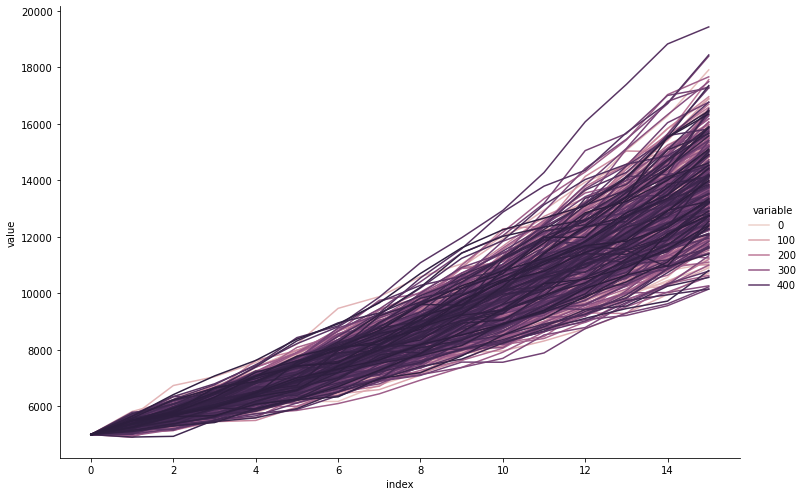

In [80]:
df_melted = pd.melt(df.reset_index(), id_vars=['index'])

line = sns.relplot(
    data=df_melted,
    x='index',
    y='value',
    hue='variable',
    height=7,
    aspect=1.5,
    kind='line'
)

In [81]:
df = pd.DataFrame([df.loc[len(df) - 1, col] for col in df.columns], columns=['end_result'])

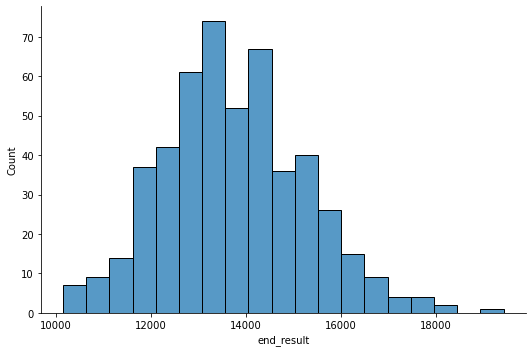

In [82]:
hist = sns.displot(
    data=df,
    x='end_result',
    kind='hist',
    height=5,
    aspect=1.5,
)